In [ ]:
from google.colab import files
import zipfile
import os
import cv2
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

uploaded = files.upload()
zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('.')

print("Extracted folders:", os.listdir('.'))

Saving final_dataset.zip to final_dataset (3).zip
Extracted folders: ['.config', 'final_dataset (3).zip', 'processed_dataset.zip', 'augmented_dataset', 'final_dataset (1).zip', '__MACOSX', 'final_dataset', 'final_dataset.zip', 'processed_dataset', 'final_dataset (2).zip', 'sample_data']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

raw_root = [f for f in os.listdir('.') if os.path.isdir(f) and not f.startswith('.')][0]
output_root = 'final_dataset'
os.makedirs(output_root, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    rescale=1./255
)

batch_size = 16
images_per_class = 100

for class_name in sorted(os.listdir(raw_root)):
    class_input_path = os.path.join(raw_root, class_name)
    class_output_path = os.path.join(output_root, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    generator = datagen.flow_from_directory(
        directory=raw_root,
        classes=[class_name],
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        save_to_dir=class_output_path,
        save_prefix=class_name,
        save_format='png',
        shuffle=True
    )

    count = 0
    while count < images_per_class:
        batch = next(generator)
        count += len(batch[0])
        if count > images_per_class:
            extras = count - images_per_class
            saved_files = sorted(os.listdir(class_output_path))
            for file in saved_files[-extras:]:
                os.remove(os.path.join(class_output_path, file))
            count = images_per_class

print("final_dataset created with augmentation")


final_dataset created with augmentation


In [ ]:
input_path = 'final_dataset'
output_path = 'split_dataset'
split_ratio = {'train': 0.72, 'val': 0.18, 'test': 0.10}

for split in split_ratio:
    for class_name in os.listdir(input_path):
        class_dir = os.path.join(output_path, split, class_name)
        os.makedirs(class_dir, exist_ok=True)

for class_name in os.listdir(input_path):
    class_path = os.path.join(input_path, class_name)
    all_images = os.listdir(class_path)
    random.shuffle(all_images)

    total = len(all_images)
    train_cutoff = int(total * split_ratio['train'])
    val_cutoff = train_cutoff + int(total * split_ratio['val'])

    train_images = all_images[:train_cutoff]
    val_images = all_images[train_cutoff:val_cutoff]
    test_images = all_images[val_cutoff:]

    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'train', class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'val', class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'test', class_name, img))

print(" Dataset split into train/val/test")

# Count images in each split
print("\n Image count per class in each split:")
def count_split_images(split):
    print(f"\n {split}:")
    base = os.path.join(output_path, split)
    for class_name in sorted(os.listdir(base)):
        count = len(os.listdir(os.path.join(base, class_name)))
        print(f"Class {class_name}: {count} images")

for s in ['train', 'val', 'test']:
    count_split_images(s)

 Dataset split into train/val/test

 Image count per class in each split:

 train:
Class 0: 215 images
Class 1: 222 images
Class 2: 215 images
Class 3: 221 images
Class 4: 223 images
Class 5: 220 images
Class 6: 219 images
Class 7: 215 images
Class 8: 218 images
Class 9: 218 images

 val:
Class 0: 96 images
Class 1: 104 images
Class 2: 94 images
Class 3: 103 images
Class 4: 109 images
Class 5: 100 images
Class 6: 102 images
Class 7: 101 images
Class 8: 97 images
Class 9: 101 images

 test:
Class 0: 61 images
Class 1: 59 images
Class 2: 63 images
Class 3: 59 images
Class 4: 62 images
Class 5: 65 images
Class 6: 66 images
Class 7: 66 images
Class 8: 64 images
Class 9: 64 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

raw_root = [f for f in os.listdir('.') if os.path.isdir(f) and not f.startswith('.')][0]
output_root = 'final_dataset'
os.makedirs(output_root, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    rescale=1./255
)

batch_size = 16
images_per_class = 120

for class_name in sorted(os.listdir(raw_root)):
    class_input_path = os.path.join(raw_root, class_name)
    class_output_path = os.path.join(output_root, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    generator = datagen.flow_from_directory(
        directory=raw_root,
        classes=[class_name],
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        save_to_dir=class_output_path,
        save_prefix=class_name,
        save_format='png',
        shuffle=True
    )

    count = 0
    while count < images_per_class:
        batch = next(generator)
        count += len(batch[0])
        if count > images_per_class:
            extras = count - images_per_class
            saved_files = sorted(os.listdir(class_output_path))
            for file in saved_files[-extras:]:
                os.remove(os.path.join(class_output_path, file))
            count = images_per_class

print("final_dataset created with augmentation")

# Count images in final_dataset
print("\n Final image count per class (after augmentation):")
for class_name in sorted(os.listdir(output_root)):
    count = len(os.listdir(os.path.join(output_root, class_name)))
    print(f"Class {class_name}: {count} images")

final_dataset created with augmentation

 Final image count per class (after augmentation):
Class 0: 225 images
Class 1: 225 images
Class 2: 225 images
Class 3: 225 images
Class 4: 225 images
Class 5: 225 images
Class 6: 225 images
Class 7: 225 images
Class 8: 225 images
Class 9: 225 images


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.92      0.96      0.94        23
           2       0.91      0.91      0.91        23
           3       0.91      0.91      0.91        23
           4       0.96      0.96      0.96        23
           5       0.91      0.91      0.91        23
           6       0.92      1.00      0.96        23
           7       0.95      0.91      0.93        23
           8       0.95      0.83      0.88        23
           9       0.91      0.87      0.89        23

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230



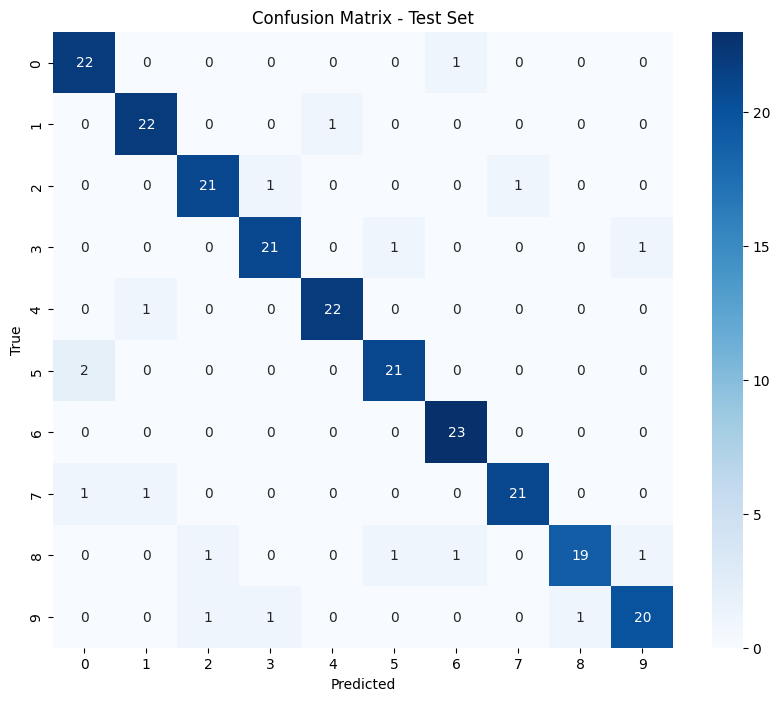

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9392 - loss: 0.2350
Final Accuracy Scores:
Train Accuracy: 97.28%
Validation Accuracy: 90.00%
Test Accuracy: 92.17%


In [ ]:
predictions = model.predict(data_test)
y_pred = np.argmax(predictions, axis=1)
y_true = data_test.classes
class_labels = [str(i) for i in range(10)]


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Print final accuracy scores
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_loss, test_acc = model.evaluate(data_test)

print(f"Final Accuracy Scores:")
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


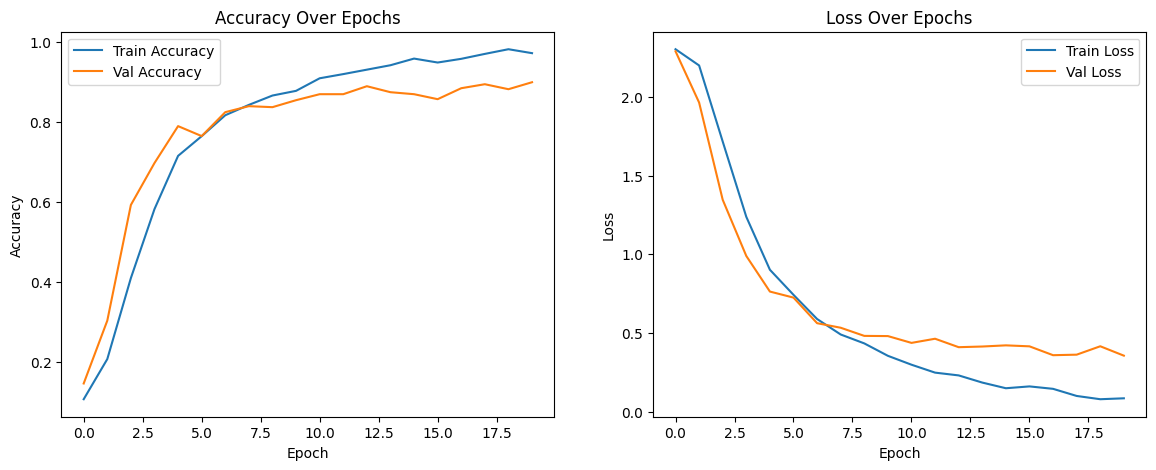

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
